# Grade: /100 pts

# Assignment 04: Confidence Intervals & The Bootstrap

Once you are finished, ensure to complete the following steps.
1.  Restart your kernel by clicking 'Kernel' > 'Restart & Run All'.
2.  Fix any errors which result from this.
3.  Repeat steps 1. and 2. until your notebook runs without errors.
4.  Submit your completed notebook to OWL by the deadline.

In [12]:
# Add the necessary imports for this homework 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.model_selection
import sklearn.linear_model
from scipy.stats import t

### Question 1: /10pts 
In this question, you will construct a confidence interval for the sample mean, not using the normal distribution, but the t-distribution (see end of lecture 4.3), which is more accurate for small sample sizes.  

The $100(1-\alpha)\%$ confidence interval is 

$$ \bar{x} \pm  t_{1-\alpha/2, n-1} \dfrac{\hat{\sigma}}{\sqrt{n}} $$

Where $ t_{1-\alpha/2, n-1}$ is the appropiorate quantile of a Student's t distribution with $n-1$ degrees of freedom.  
Write a function called `confidence_interval` which takes as it's argument an array of data called `data` and returns two things:

* An estimated mean of `data`, and 

* The lower and upper bounds of the 95% confidence interval for the mean of `data`.  Ensure these are returned in a numpy array of shape (2,)

To get the appropirate quantiles for the t-distribution, you can use `scipy.stats.t`, which implements some statistical functions for the t-distribution.  Take a look at the documentation for `scipy.stats.t`, especially the `ppf` method.

Here is the documentation: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.t.html


In [13]:
def confidence_interval(data):

    # Note, np.std divides by n and not n-1
    # Force it to apply the correct formula by ussing ddof=1
    # Alternaively, you can use scipy.stats.sem to compute
    #The standard error

   # print(data)

    estimated_mean = np.mean(data)
    estimatedStandardDev = np.std(data, ddof=1)

    CriticalT = t.ppf(1-0.05/2,len(data)-1) #len(data) is n

    marginOfErr = CriticalT * (estimatedStandardDev/np.sqrt(len(data)))

    #print(marginOfErr)

    bounds = np.array([estimated_mean - marginOfErr, estimated_mean + marginOfErr])
    
    return estimated_mean, bounds


### Question 2: /15pts

The "95% confidence interval" is named so because the long term relative frequency of these estimators containing the true estimand is 95%.  That is to say **if I construct 100 95% confidence intervals for the sample mean again and again from the same data generating mechanism, 95 of these intervals I construct will contain the true population mean**.

Write a function called `ci_simulation` that runs some simulations to show this is the case.  From a standard normal distribution, sample 25 observations and construct a confidence interval.  Do this 20 times and plot the intervals using `matplotlib.pyplot.errorbar`.  Color the bar red if the confidence interval does not capture the true mean and blue if it does.  If you are unfamilliar with `matplotlib.pyplot.errorbar`, I highly suggest reading Matplotlib's excellent documentation which has some examples at the bottom of the webpage.

If you are unfamilliar with how to sample random numbers, I suggest you look at `numpy.random.normal`.  Try searching for the documentation for that function yourself if you need to.

Here is the documentation for `matplotlib.pyplot.errorbar`: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.errorbar.html

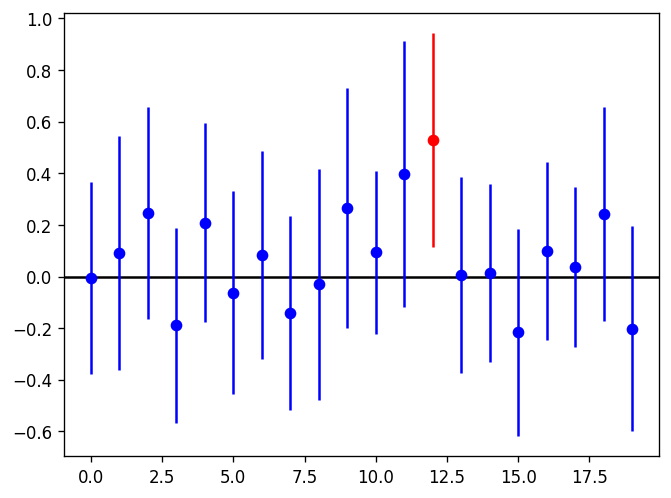

In [14]:
def ci_simulation():
    # Set the random seed to always get the same random numbers. 
    # This is for Reproducibility. 
    np.random.seed(4)
    
    # Create the figure.
    fig, ax = plt.subplots(dpi = 120)

    # If the interval crosses this line, it should be blue, else red.
    ax.axhline(0, color = 'k')

    # Do the following 20 times
    for i in range(20):

        #Draw 25 observations from a standard normal

        sample = np.random.normal(loc=0, scale=1, size=25)

        # Compute what we need for the CI, namely the mean and the bounds

        mu, bounds = confidence_interval(sample)
        
        # color should be blue if it crosses the black line
        color = 'blue'
        if (min(bounds)>0)|(max(bounds)<0):
            # but in the case it does not, turn it red
            color = 'red'

        # Need to get the length of the interval from bounds
        interval_len = 1.0/2*(bounds[1] - bounds[0])

        ax.errorbar(i, mu, yerr=interval_len, color = color, fmt = 'o')

    # This function does not have to return anything
    return None

ci_simulation()

### Question 3: /8pts

If you haven't changed the random seed from 4 and if you implemented the solution correctly, you should see one red interval.

Answer the following below in no more than 3 sentences:

a) How many red intervals did we expect to see?  What is your justifiation for this?

Changing the random seed might affect how many red intervals you see.  Try changing the  random seed in your function to 3.  This will yield two red intervals (which is different than what you should expect to see). 

b) Why does the simulation sometimes deviate from the predicted results?


a **Answer**) Confidence intervals are made to capture the true mean 95% of the time. That means 5% of the intervals are going to miss the true mean. $20 * 0.05 = 1$ which means 1 interval (the red one) misses the true mean.

b **Answer**) When we get a sample to run the simulation, there will always be slight differences in the numbers given from `np.random.normal`. This means that sometimes, the simulation can deviate from the predicted results.

### Question 4: /10pts

Load in the `hockey_draftees_2005.csv` data into pandas. It contains data from hockey players drafted in 2005, including their rank, weight (wt - in pounds) and height (ht - in inches). 

Fit a linear model of weight (`wt`) explained by height (`ht`) using a linear regression model from sklearn, as done in the lab (but with linear fit instead of cubic.)  Call your fitted model `model`.  
Make a scatter plot of the height (x-axis) against weight (y-axis). 
Add the predicted values for 66-80 inches. 

Calculate the residuals from the fit, and report the r-squared for this model.

Residuals:
 0      9.177718
1     19.247524
2     15.247524
3      4.712621
4     -0.682671
5      2.317329
6     18.317329
7     -5.147768
8     -4.752476
9      2.387134
10    18.642816
11     7.922037
12   -10.682671
13    -9.682671
14    -0.822282
15     4.712621
16     1.642816
17     6.852232
18    15.991842
19     4.712621
20     3.782426
21    -8.682671
22    -0.287379
23    11.317329
24    -2.147768
25     9.712621
26    25.782426
27     0.247524
28    -7.822282
29   -22.217574
30     1.317329
31   -14.217574
32   -10.287379
33   -13.752476
34    14.177718
35    -2.357184
36   -16.147768
37    -9.752476
38     3.317329
39     7.782426
40   -12.357184
41    12.247524
42     2.782426
43     2.177718
44    -7.287379
45    -8.287379
46     6.317329
47     9.247524
48   -19.682671
49     3.852232
50   -12.682671
51   -11.543060
52   -19.217574
53    -3.217574
54     3.642816
55   -14.752476
56   -20.217574
57    20.387134
58    -1.287379
Name: wt, dtype: float64
Training R2 is  0.4

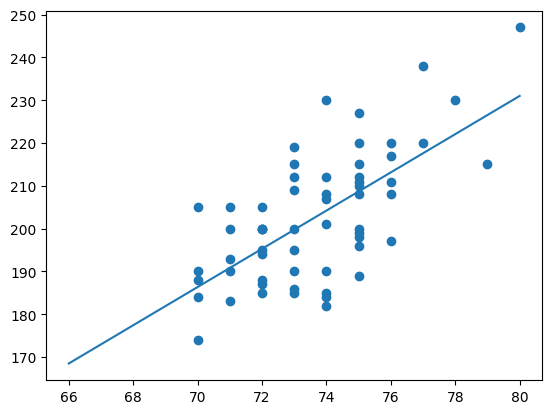

In [15]:
df=pd.read_csv('hockey_draftees_2005.csv')
# Make linear regression object and fit the model 
model = sklearn.linear_model.LinearRegression()
X_fit = np.c_[df.ht]
model.fit(X_fit, df.wt)

# Make the scatter plot 
plt.scatter(df.ht, df.wt)

#Generate and plot the predicted values

predHt = np.linspace(66,80)
X_pred = np.c_[predHt]
predWt = model.predict(X_pred)
plt.plot(predHt, predWt)

# Calculate residuals, R2 and print it  

residuals = df.wt - model.predict(X_fit)

print('Residuals:\n', residuals)
print('Training R2 is ', model.score(X_fit, df.wt)) #this used to say rsquared but in documentation score does the same thing


### Question 5:  /15pts
### Bootstrap confidence intervals on parameters

How confident can we be about the relation between height and weight? 
To judge this we need confidence intervals. Let's use the bootstrap.

Modify the function `BootstrapCoef` from lab 04 - part 2 to conduct a boostrap analysis for this regression mode; 

* `data`, which is a dataframe having columns 'weight' and 'height'
* `numboot` which is an integer denoting how many bootstrap replications to perform.

Write `bootstrap` to perform bootstrap resampling. You can use `pd.DataFrame.sample` with `replace = True` to perform the resampling.  `bootstrap` should return:
params: a numpy array of size [numboot,numParams] of bootstraped parameter values. The parameters are the intercept value and the slope from the linear regression. 
Tip: Note that the intercept can be retrieved from model.intercept_, whereas all the other regression coefficients are stored in model.coef_. 

Here is the documentation for `pd.DataFrame.sample`: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sample.html

Then call the function to get 100 bootstrap samples for your linear regression model of wt explained by height. 
Make a joint scatter plot of the parameter value for the intercept and for the slope. 

In [16]:
q5model = sklearn.linear_model.LinearRegression()

# Write a Bootstrap function that records the fitted models 
def BootstrapCoef(data,numboot):
    n = len(data)
    params = np.zeros((numboot,2))    
    for i in range(numboot):
        d = data.sample(n, replace=True)
        X_fit = np.c_[d.ht]
        q5model.fit(X_fit,d.wt)
        params[i, 0] = q5model.intercept_
        params[i, 1]=q5model.coef_[0]
        
    
    return params


bootstrap_params = BootstrapCoef(df, numboot=100)
print(bootstrap_params)

[[-202.22956294    5.47909104]
 [-139.64164275    4.62011482]
 [-162.2054982     4.96461003]
 [ -59.74180564    3.566705  ]
 [ -34.65085209    3.25389228]
 [-112.2221138     4.2602198 ]
 [ -26.39797883    3.08504056]
 [-125.40731501    4.46803383]
 [-112.78991115    4.29507022]
 [-161.5697619     4.91690476]
 [-124.53021614    4.43515659]
 [-105.55598744    4.18537898]
 [-116.19465181    4.33236769]
 [ -71.35334873    3.70508083]
 [-127.9602183     4.46158265]
 [-129.00324675    4.5070604 ]
 [   8.55668359    2.61661027]
 [-132.14474588    4.54733288]
 [-138.83532873    4.64113231]
 [-204.07447834    5.55597931]
 [-107.50834437    4.25251656]
 [-174.70131497    5.14871634]
 [-169.42231638    5.08333333]
 [-120.94448121    4.39299894]
 [ -63.40253913    3.58186494]
 [-188.4712312     5.30871808]
 [-133.51300823    4.53854066]
 [-163.98821281    5.01019433]
 [-214.65032759    5.6762315 ]
 [-108.72184793    4.26863437]
 [ -71.54456119    3.71810878]
 [-108.22589134    4.24388795]
 [-111.7

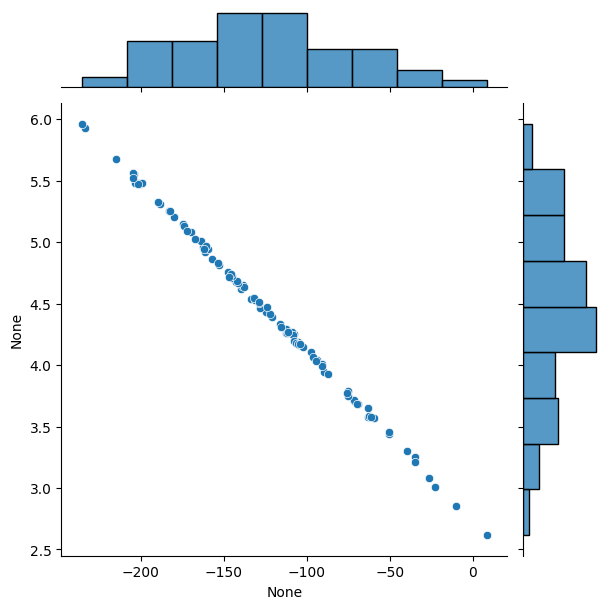

In [17]:
# Make scatter plot
sns.jointplot(x=bootstrap_params[:, 0], y=bootstrap_params[:, 1])


### Question 6: /12pts

Plot the bootstrap estimates for the slope as a histogram.  Use your samples to compute a 95% confidence interval. Note that the CI should be constructed around the sample estimate of the slope. How can you interpret this confindence interval?  

My confidence interval is between 3.043176165574801  and  5.6225551228987465


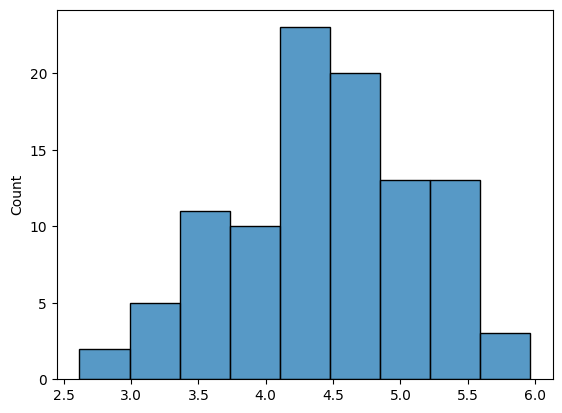

In [18]:
# Calculate bootstrap interval

sns.histplot(bootstrap_params[:, 1])
boot_ci = np.percentile(bootstrap_params[:, 1], [2.5, 97.5])

print('My confidence interval is between', boot_ci[0], ' and ', boot_ci[1])

Written answer: The interval contains the true slope parameter with the probability of the slope being in the interval being 95%. 

### Question 7: /15pts
Modify the function `BootstrapPred` from lab04 to bootstrap your fit and generate a predict from each of these bootstrapped models.  

Draw again a scatter plot of ht against weight. and plot the predictions from the 20 fitted bootstrap models to derive predictions for the height ranging from 66 to 80. Draw all these lines onto your scatter plot. 

Written question: Where are we most uncertain in our prediction about the weight of a player? How does the negative correlation between slope and intercept play a role here?  Why is the spread of the prediction in the mean weight so much lower than the variability of our intercept parameter? 

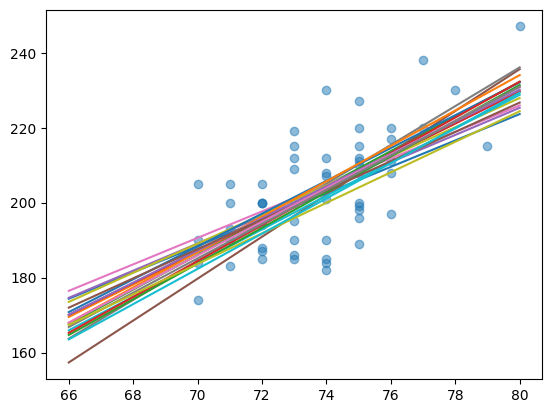

In [19]:
q7model = sklearn.linear_model.LinearRegression()

# Write a Bootstrap function that records the fitted models 
def BootstrapPred(data,xp):
    numboot = 1000
    n = len(data)
    X_pred = np.c_[xp]
    y_pred = np.zeros((numboot,X_pred.shape[0]))    

    for i in range(numboot):
        d = data.sample(n, replace=True)
        X_fit = np.c_[d.ht]
        q7model.fit(X_fit,d.wt)
        y_pred[i,:]=q7model.predict(X_pred)
    return y_pred
# Get predictions from 20 bootstrapped models 
y_pred = BootstrapPred(df,np.linspace(66,80))

# Make a scatterplot and draw the 20 lines  

plt.scatter(df.ht,df.wt,alpha=0.5)

for i in range(20):
    plt.plot(np.linspace(66,80), y_pred[i,:])

**Written Answer Here**
We're the most uncertain about the player's weight when we're near the extremes of the x-axis (height). This is shown in the lines above; the further apart the lines are spread along the y-axis, the more uncertain we are.

The negative correlation between intercept and slope reinforces this observation, since the higher slope consequently results in a more "extreme" intercept.

The intercepts are more variable, since they adjust to keep the regression line positioned properly for the actual data range being plotted. The slope represents the rate of change, which the model is actually trying to predict and display accurately. This, on top of the fact that the data is mostly clumped around the mean height, means that the lines will move closer together in the center (more stable predictions near the mean height).


### Question 8:  /15pts

Now, let's see how well our model performs out of sample.  Load in the `hockey_draftees_test.csv` file into a dataframe.  
Use your fitted `model` to make predictions. 

Make a scatter plot of the test data and superimpose the prediction of the model. 
To evaluate this prediction, calculate the r-squared value for the out of sample (oos) data.  Statsmodels doesn't provide a function to compute r-squared on new data.  You will have to write one yourself or find one that performs the computation for you.

Out of sample rsquared is  0.32764077825120885


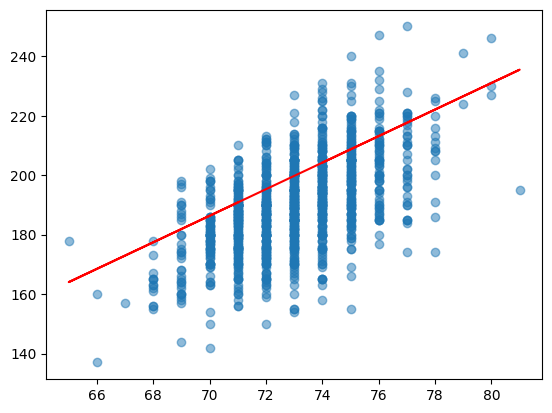

In [21]:
import sklearn.metrics

df_test=pd.read_csv('hockey_draftees_test.csv')

# Make the scatter plot 

plt.scatter(df_test.ht, df_test.wt, alpha=0.5)

# Generate and plot the predicted values
X_fit = np.c_[df.ht]
model.fit(X_fit, df.wt)
X_pred = np.c_[df_test.ht]
y_pred = model.predict(X_pred)

plt.plot(df_test.ht, y_pred, color='red')

# Now do the prediction for the test data and compute R2

r2 = sklearn.metrics.r2_score(df_test.wt, y_pred)
rsquared_oos = r2

print('Out of sample rsquared is ', rsquared_oos)

